In [68]:
from seedlings import *
from wordbank import *
from words import *
from top_dense import *

In [78]:
from scipy import stats
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
import powerlaw
import re
from operator import itemgetter

In [70]:
%reload_ext autoreload
%autoreload 2

In [5]:
wordbank = WordBank(input="data/wb_cdi/wb_eng.csv")

In [20]:
top_graph, tau, p = top_kendall_threshold('data/output/seedlings/semgraphs', 
                                      wb=wordbank, wb_month='16', 
                                      source='SEEDLings')

print "threshold:   {}".format(top_graph.threshold)
print "kendall tau: {}".format(tau)
print "p-value:     {}".format(p)

threshold:   0.84
kendall tau: 0.349528013546
p-value:     1.49775385402e-17


In [6]:
seedlings = Seedlings('data/seedlings/basic_level_concat.csv')


In [19]:
graph_df = top_graph.top_n_dense(all=True)

def merge_counts(graph_df, seedlings_df):
    new_df = pd.merge(graph_df, 
                      seedlings_df[['basic_level', 'count']], 
                      left_on='word', 
                      right_on='basic_level').drop_duplicates('basic_level')
    return new_df

merged_df = merge_counts(graph_df, seedlings.data)

merged_df.to_csv("top_tau_seedlings.csv")

In [86]:
%%capture
top_graph, pl_result = min_powerlaw_alpha(path='data/output/seedlings/semgraphs', wb=wordbank)

In [87]:
pl_result.alpha

2.422295555667338

In [91]:
degree_distribution = top_graph.degree_distr()
ggplot(degree_distribution, aes(x='degree')) + geom_histogram(binwidth=10)
top_graph.threshold

0.4

In [61]:
seed_graph = SemanticGraph(path='data/output/seedlings/semgraphs/cosine_0.4/semgraph_16', 
                          wb=wordbank, source="SEEDLings", sim_func='cos')

In [62]:
degree_distribution = seed_graph.degree_distr()

In [63]:
%%capture
result = powerlaw.Fit(degree_distribution.dropna().values[:, 0])
# result = powerlaw.Fit(degree_distribution.dropna().values[:, 0], sigma_threshold=0.2)



In [64]:
result.alpha

3.086431495198378

In [65]:
result.sigma

0.23474188313586886

In [66]:
result.xmin

8.0

In [77]:
%%capture
pl_values = kendall_powerlaw_tuples('data/output/seedlings/semgraphs', wb=wordbank, wb_month='16')

In [80]:
cosines = [x[0] for x in pl_values]
alphas = [x[1].alpha for x in pl_values]

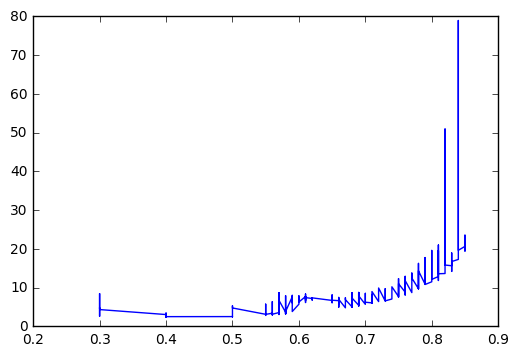

In [82]:
plt.plot(cosines, alphas)
plt.show()